In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('book.csv')
data.head(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
data.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [4]:
a = []
for i in data.columns:
    a.append({'Items': i, 'counts': data[i].value_counts()[1]})
a = pd.DataFrame(a)
a.sample(2)

,Items,counts
10,Florence,217
7,ItalCook,227


#### plotting counts of each books

<AxesSubplot:xlabel='Items'>

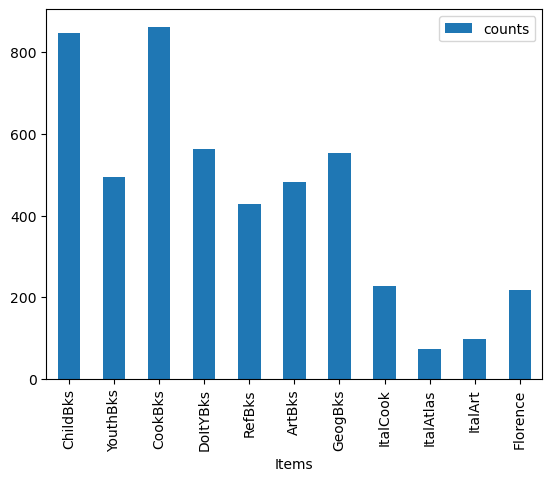

In [5]:
a.plot.bar(x = 'Items', y = 'counts')

In [6]:
# item_frequencies = Counter(data)

In [7]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

#### finding which books are bought together
#### 1. Association rules with 10% Support and 70% confidence

In [8]:
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames=True)
print(frequent_itemsets)

    support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925

C:\Users\vinodh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.7)
print(rules)

           antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, CookBks)           (GeogBks)              0.1670   
96  (GeogBks, CookBks)            (ArtBks)              0.1925   
97            (ArtBks)  (GeogBks, CookBks)              0.2410   
98           (GeogBks)   (ArtBks, CookBks)              0.2760   
99           (CookBks)   (ArtBks, GeogBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1               0.2475   0.1650    0.390071  1.57

In [10]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


<AxesSubplot:>

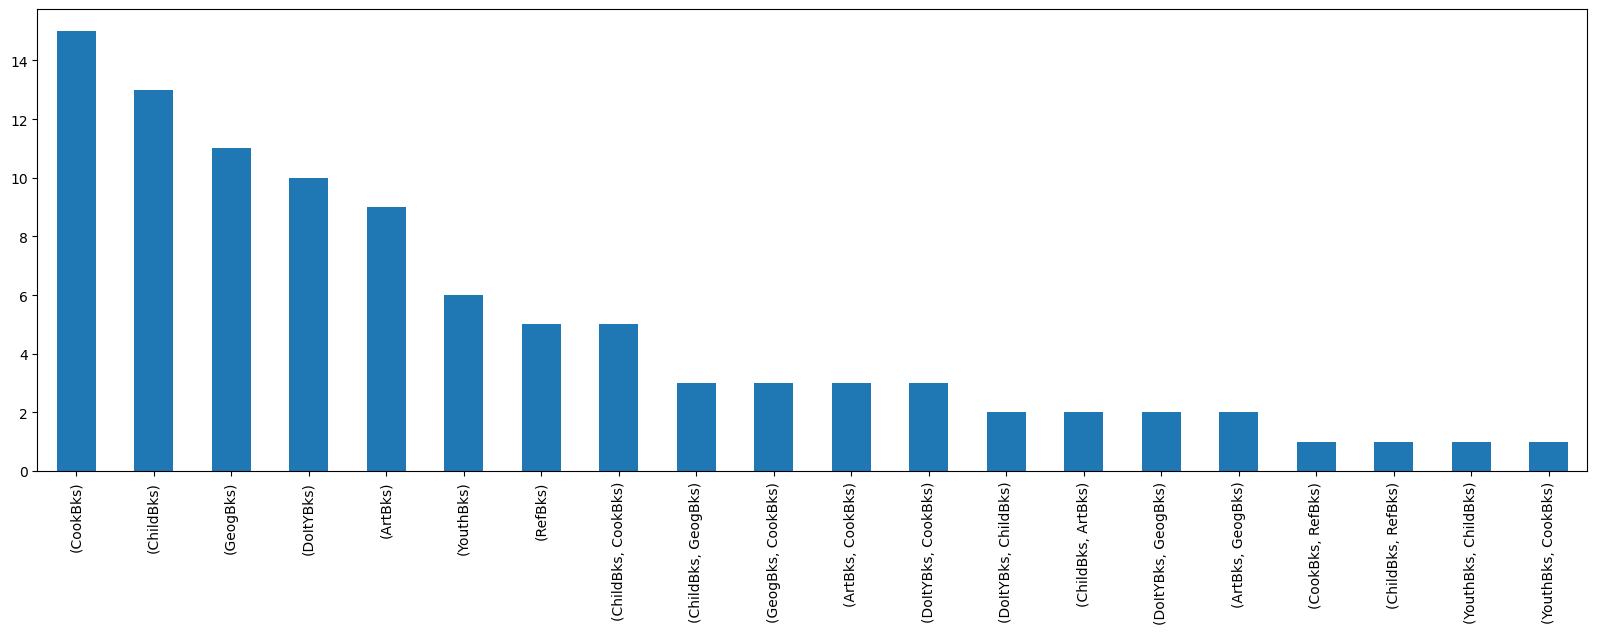

In [11]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='support', ylabel='confidence'>

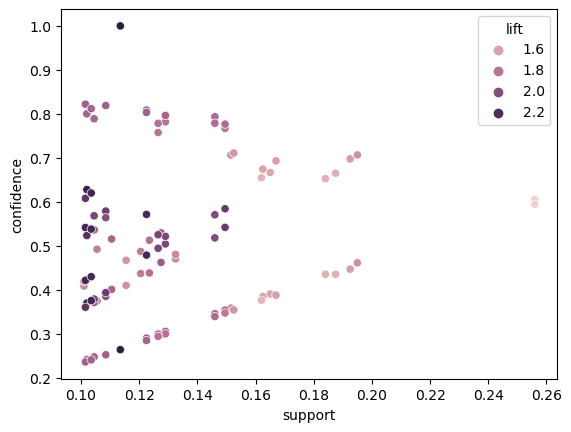

In [12]:
conf = rules['confidence']
supp = rules['support']
sns.scatterplot(supp, conf, hue = rules['lift'])

#### 2. Association rules with 15% Support and 80% confidence

In [13]:
frequent_itemsets = apriori(data, min_support = 0.15, use_colnames=True)
print(frequent_itemsets)

    support              itemsets
0    0.4230            (ChildBks)
1    0.2475            (YouthBks)
2    0.4310             (CookBks)
3    0.2820            (DoItYBks)
4    0.2145              (RefBks)
5    0.2410              (ArtBks)
6    0.2760             (GeogBks)
7    0.1650  (YouthBks, ChildBks)
8    0.2560   (ChildBks, CookBks)
9    0.1840  (DoItYBks, ChildBks)
10   0.1515    (ChildBks, RefBks)
11   0.1625    (ChildBks, ArtBks)
12   0.1950   (ChildBks, GeogBks)
13   0.1620   (YouthBks, CookBks)
14   0.1875   (DoItYBks, CookBks)
15   0.1525     (RefBks, CookBks)
16   0.1670     (ArtBks, CookBks)
17   0.1925    (GeogBks, CookBks)


C:\Users\vinodh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.8)
print(rules)

   antecedents consequents  antecedent support  consequent support  support  \
0   (YouthBks)  (ChildBks)              0.2475              0.4230   0.1650   
1   (ChildBks)  (YouthBks)              0.4230              0.2475   0.1650   
2   (ChildBks)   (CookBks)              0.4230              0.4310   0.2560   
3    (CookBks)  (ChildBks)              0.4310              0.4230   0.2560   
4   (DoItYBks)  (ChildBks)              0.2820              0.4230   0.1840   
5   (ChildBks)  (DoItYBks)              0.4230              0.2820   0.1840   
6   (ChildBks)    (RefBks)              0.4230              0.2145   0.1515   
7     (RefBks)  (ChildBks)              0.2145              0.4230   0.1515   
8   (ChildBks)    (ArtBks)              0.4230              0.2410   0.1625   
9     (ArtBks)  (ChildBks)              0.2410              0.4230   0.1625   
10  (ChildBks)   (GeogBks)              0.4230              0.2760   0.1950   
11   (GeogBks)  (ChildBks)              0.2760      

In [15]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621,0.692045
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125,0.664355


<AxesSubplot:>

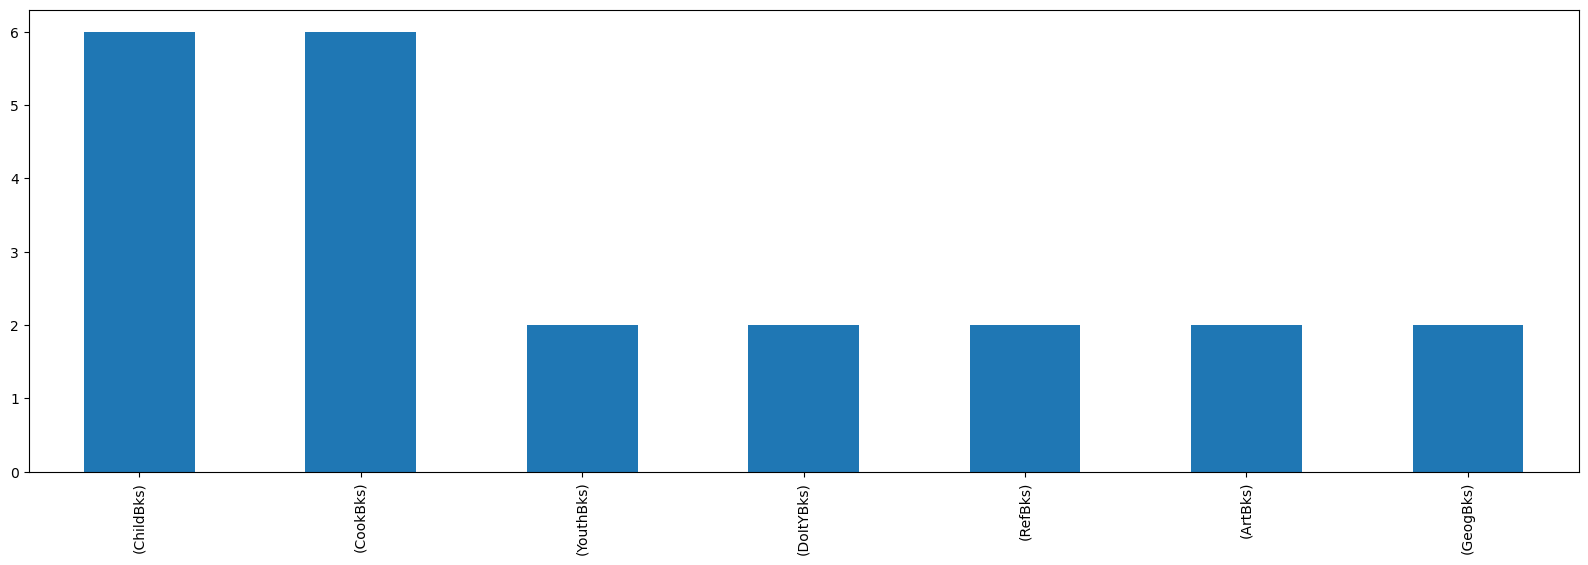

In [16]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

In [17]:
conf = rules['confidence']
supp = rules['support']

<AxesSubplot:xlabel='support', ylabel='confidence'>

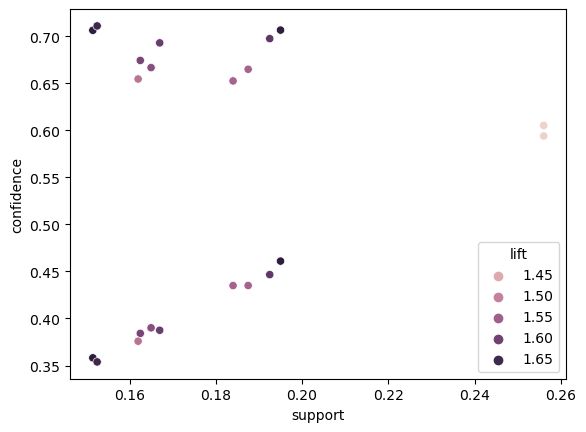

In [18]:
sns.scatterplot(supp, conf, hue = rules['lift'])

#### from above we can see by increasing the min_support value, frequency of books bought
#### together are getting reduced
So, Setting Min_support as 10% and frequency as 60%

In [19]:
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames=True)
print(frequent_itemsets)

    support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925

C:\Users\vinodh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [20]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.6)
print(rules)

           antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, CookBks)           (GeogBks)              0.1670   
96  (GeogBks, CookBks)            (ArtBks)              0.1925   
97            (ArtBks)  (GeogBks, CookBks)              0.2410   
98           (GeogBks)   (ArtBks, CookBks)              0.2760   
99           (CookBks)   (ArtBks, GeogBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1               0.2475   0.1650    0.390071  1.57

In [21]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


<AxesSubplot:>

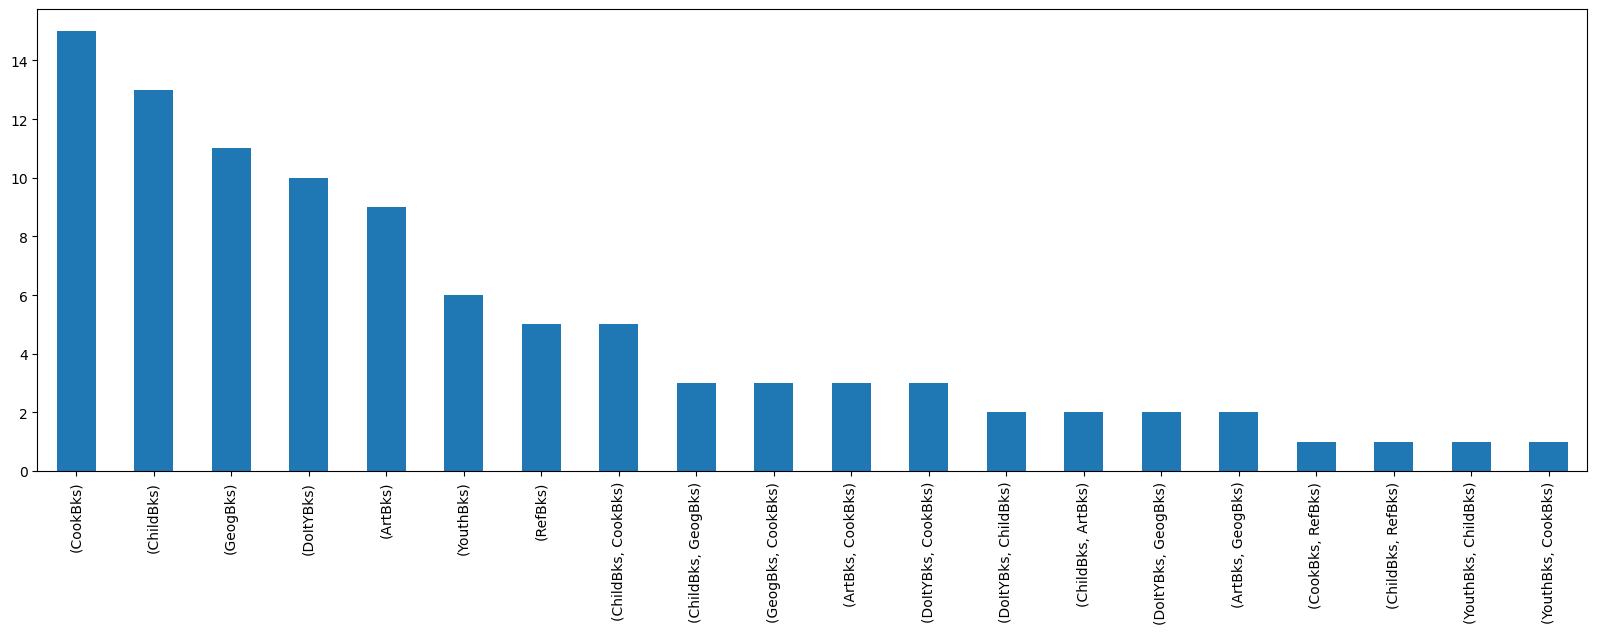

In [22]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='support', ylabel='confidence'>

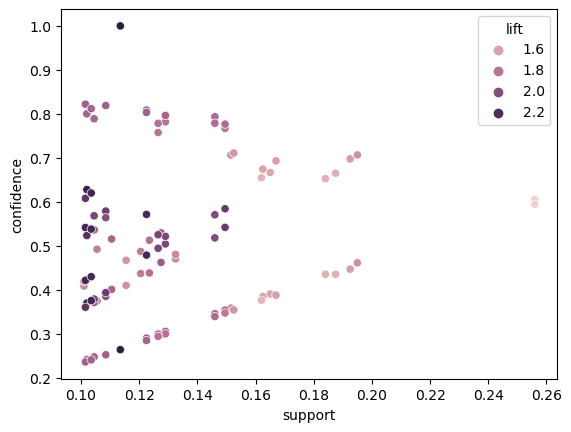

In [23]:
conf = rules['confidence']
supp = rules['support']
sns.scatterplot(supp, conf, hue = rules['lift'])